In [1]:
import os
os.chdir(r'C:\Users\82107\Desktop\Study\ML learning')
print('current directory:', os.getcwd())

current directory: C:\Users\82107\Desktop\Study\ML learning


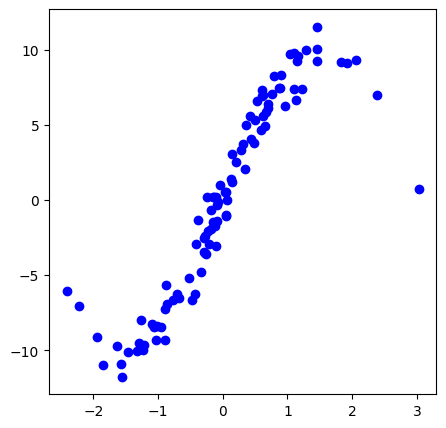

In [6]:
# mnist dataset을 제공하는 tensorflow 모듈을 불러온다.
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras import layers
# 행렬을 다루기 위한 모듈을 불러온다.
import numpy as np 
# plot을 그리기 위한 모듈을 불러온다.
import matplotlib.pylab as plt 

np.random.seed(1)
n = 100
p = 10
x = np.random.normal(size=(n, p))
y = np.sin(x[:, [4]])*10 + np.random.normal(size=(n,1))

fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.plot(x[:, 4], y, 'o', color='blue')

In [7]:
input_layer = layers.Input((p))
dense_layer1 = layers.Dense(units=2, activation='sigmoid')
h = dense_layer1(input_layer)
dense_layer2 = layers.Dense(units=1, activation='linear')
h = dense_layer2(h)

model = K.models.Model(input_layer, h)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 2)                 22        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(optimizer='sgd',
              loss='mse',
              metrics=['mse'])

Epoch 1/200
3/3 [==============================] - 0s 51ms/step - loss: 41.9946 - mse: 41.9946 - val_loss: 44.5451 - val_mse: 44.5451
Epoch 2/200
3/3 [==============================] - 0s 9ms/step - loss: 41.9183 - mse: 41.9183 - val_loss: 44.5656 - val_mse: 44.5656
Epoch 3/200
3/3 [==============================] - 0s 9ms/step - loss: 41.8388 - mse: 41.8388 - val_loss: 44.5579 - val_mse: 44.5579
Epoch 4/200
3/3 [==============================] - 0s 10ms/step - loss: 41.7638 - mse: 41.7638 - val_loss: 44.5886 - val_mse: 44.5886
Epoch 5/200
3/3 [==============================] - 0s 12ms/step - loss: 41.6928 - mse: 41.6928 - val_loss: 44.5494 - val_mse: 44.5494
Epoch 6/200
3/3 [==============================] - 0s 9ms/step - loss: 41.5923 - mse: 41.5923 - val_loss: 44.5583 - val_mse: 44.5583
Epoch 7/200
3/3 [==============================] - 0s 9ms/step - loss: 41.5025 - mse: 41.5025 - val_loss: 44.5192 - val_mse: 44.5192
Epoch 8/200
3/3 [==============================] - 0s 10ms/step - 

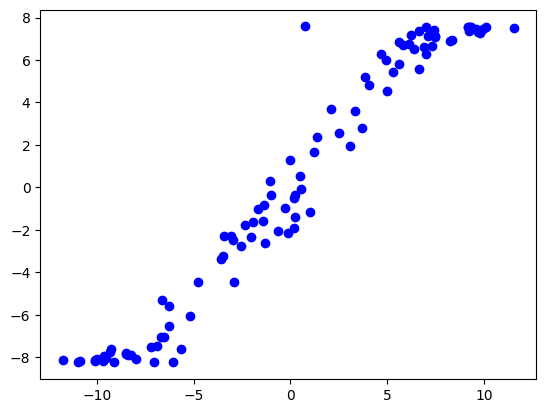

In [9]:
model.fit(x, y,
          epochs=200,
          validation_split=0.2)
yhat = model.predict(x)
plt.plot(y, yhat, 'o', color='blue')

In [14]:
print(dense_layer1.weights)

[<tf.Variable 'dense/kernel:0' shape=(10, 2) dtype=float32, numpy=
array([[ 0.11784881, -0.12497514],
       [ 0.05075088, -0.09591489],
       [-0.2876779 , -0.08712042],
       [-0.04584261,  0.07231975],
       [ 3.4935637 , -3.9486394 ],
       [ 0.12146213, -0.02501374],
       [-0.00587233,  0.01739467],
       [ 0.22799607,  0.35371092],
       [-0.04032657,  0.18875699],
       [-0.14845325,  0.06156785]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([ 0.1453099 , -0.34805384], dtype=float32)>]


In [15]:
print(dense_layer1.weights[0][0, 0])

tf.Tensor(0.11784881, shape=(), dtype=float32)


In [17]:
print(dense_layer1.weights[0][1, 0])

tf.Tensor(0.050750878, shape=(), dtype=float32)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 143 (572.00 Byte)
Trainable params: 143 (572.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 42.4266 - mse: 42.4266 - val_loss: 33.3989 - val_mse: 33.3989
Epoch 2/100
250/250 [==============================] - 0s 812us/step - loss: 29.4457 - mse: 29.4457 - val_loss: 26.9017 - val_mse: 26.9017
Epoch 3/1

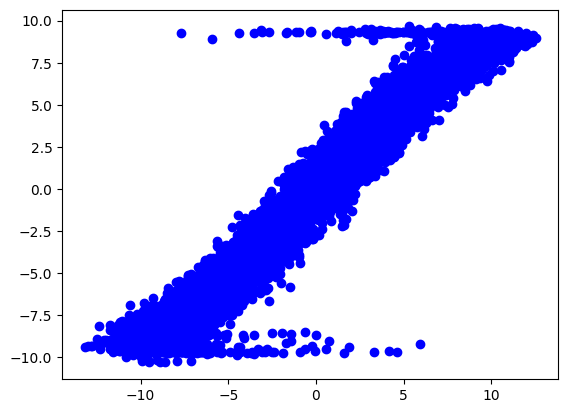

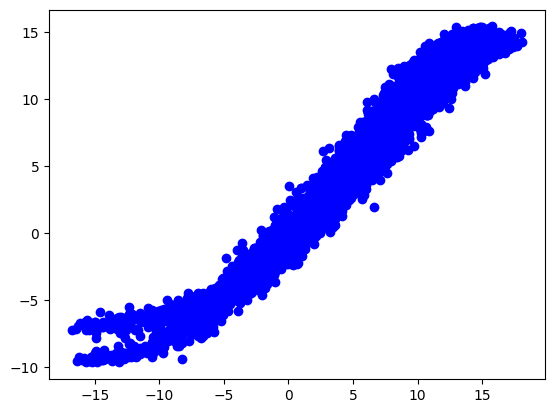

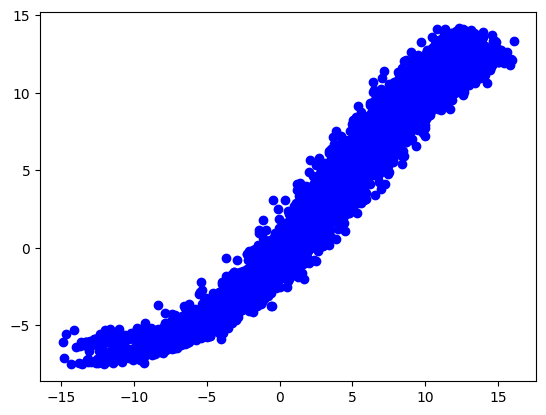

In [18]:
np.random.seed(1)
n = 10000
p = 10
x = np.random.normal(size=(n, p))
y1 = np.sin(x[:, [4]])*10 + np.random.normal(size=(n, 1))
y2 = np.cos(x[:, [3]])*15 + np.random.normal(size=(n, 1))
y3 = np.cos(x[:, [0]])*13 + np.random.normal(size=(n, 1))
y = np.hstack((y1, y2, y3))

input_layer = layers.Input((p))
dense_layer1 = layers.Dense(units=10, activation='sigmoid')
h = dense_layer1(input_layer)
dense_layer2 = layers.Dense(units=3, activation='linear')
h = dense_layer2(h)

model = K.models.Model(input_layer, h)
model.summary()

model.compile(optimizer='sgd',
              loss='mse',
              metrics=['mse'])

model.fit(x, y,
          epochs=100,
          validation_split=0.2)

yhat = model.predict(x)
for i in range(y.shape[1]):
    plt.plot(y[:, i], yhat[:, i], 'o', color='blue')
    plt.show()

In [20]:
dense_layer1.weights[0][:5]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[-3.4627371e-02, -8.8161295e-03,  3.3641281e+00, -5.9327256e-02,
         3.2206997e-02, -6.0594957e-02, -3.2530663e+00, -3.8958688e+00,
        -2.5256770e-04,  5.9503634e-03],
       [-1.4803826e-02,  8.2878157e-02,  6.2644044e-03,  3.6477253e-02,
         1.5782982e-03, -3.1439964e-02, -5.1070042e-03,  1.3010849e-02,
        -4.3764785e-02, -1.1578084e-01],
       [-8.3696255e-03,  1.7904145e-01,  3.6565966e-03, -6.1700851e-02,
         9.0770852e-03, -1.6362686e-02, -2.0981777e-02,  7.3386312e-02,
         5.0464626e-03, -1.9320895e-01],
       [ 4.2215443e+00, -5.3787872e-02,  2.1216080e-02,  7.5351268e-02,
        -3.2438660e+00,  5.8287799e-02,  1.6968634e-02,  1.7940870e-02,
         4.6334066e+00,  1.3397937e-01],
       [ 1.9903423e-02, -2.4304097e+00, -9.3268799e-03,  4.0079957e-01,
        -2.0530643e-02,  2.4845381e+00, -1.2008808e-01,  2.0966306e-01,
        -1.1314111e-02, -2.4317751e+00]], dtype=float32)>

In [22]:
from sklearn.datasets import load_wine
data = load_wine()
x = data.get('data')
y = data.get('target')
y = K.utils.to_categorical(y, num_classes=3, dtype='float32')

input_layer = layers.Input((x.shape[1]))
dense_layer1 = layers.Dense(units=10, activation='relu')
h = dense_layer1(input_layer)
dense_layer2 = layers.Dense(units=3, activation='softmax')
h = dense_layer2(h)

model = K.models.Model(input_layer, h)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_4 (Dense)             (None, 10)                140       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 173 (692.00 Byte)
Trainable params: 173 (692.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x, y,
          epochs=50,
          validation_split=0.2)

# 정확도가 매우 낮은것을 확인할 수 있음

Epoch 1/50
5/5 [==============================] - 0s 24ms/step - loss: 279.6257 - accuracy: 0.4155 - val_loss: 1.1111 - val_accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 5ms/step - loss: 1.0923 - accuracy: 0.5000 - val_loss: 1.1230 - val_accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 7ms/step - loss: 1.0878 - accuracy: 0.5000 - val_loss: 1.1357 - val_accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 1.0831 - accuracy: 0.5000 - val_loss: 1.1478 - val_accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 6ms/step - loss: 1.0790 - accuracy: 0.5000 - val_loss: 1.1602 - val_accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 5ms/step - loss: 1.0747 - accuracy: 0.5000 - val_loss: 1.1716 - val_accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 5ms/step - loss: 1.0707 - accuracy: 0.5000 - val_loss: 1.1825 - val_accuracy: 0.0000e+00
Epo

In [27]:
yhat = model.predict(x)
yhat[:5] #데이터가 달라지지만 y hat 값이 동일한 것을 확인(보통은 데이터의 전처리의 문제)

6/6 [==============================] - 0s 796us/step


array([[0.3684282 , 0.42522144, 0.20635039],
       [0.3684282 , 0.42522144, 0.20635039],
       [0.3684282 , 0.42522144, 0.20635039],
       [0.3684282 , 0.42522144, 0.20635039],
       [0.3684282 , 0.42522144, 0.20635039]], dtype=float32)

In [26]:
model.evaluate(x, y, verbose=0)
# 정확도가 40%밖에 안된다. 

[1.0976402759552002, 0.3988763988018036]

In [28]:
import sklearn
x = sklearn.preprocessing.scale(x, axis=0)  #데이터 표준화(scaling 안했을 때 나쁜 경우에 사용)

input_layer = layers.Input((x.shape[1]))
dense_layer1 = layers.Dense(units=10, activation='relu')
h = dense_layer1(input_layer)
dense_layer2 = layers.Dense(units=3, activation='softmax')
h = dense_layer2(h)
model = K.models.Model(input_layer, h)
model.summary()
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x, y,
          epochs=50,
          validation_split=0.2)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_6 (Dense)             (None, 10)                140       
                                                                 
 dense_7 (Dense)             (None, 3)                 33        
                                                                 
Total params: 173 (692.00 Byte)
Trainable params: 173 (692.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
5/5 [==============================] - 0s 23ms/step - loss: 1.0211 - accuracy: 0.5070 - val_loss: 1.1048 - val_accuracy: 0.2500
Epoch 2/50
5/5 [==============================] - 0s 5ms/step - loss: 0.9733 - accuracy: 0.5352 - val_loss: 1.1052 - val_accuracy: 0.3056
Epoch 3/

In [29]:
yhat = model.predict(x)
yhat[:5] 

6/6 [==============================] - 0s 624us/step


array([[0.9813494 , 0.0140273 , 0.00462323],
       [0.71640027, 0.23845048, 0.04514924],
       [0.8833593 , 0.10885491, 0.00778578],
       [0.9847534 , 0.01285607, 0.00239059],
       [0.8501524 , 0.10634159, 0.04350601]], dtype=float32)

In [30]:
model.evaluate(x, y, verbose=0)
#트레이닝 데이터의 정확도가 90%까지 올라왔다는 것을 볼 수 있음

[0.3591684103012085, 0.898876428604126]